In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

from treeinterpreter import treeinterpreter as ti

import pydotplus
from IPython.display import Image, display

In [2]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone_df = pd.read_csv('abalone.csv', names=column_names)
abalone_df['sex'] = abalone_df['sex'].map({'F': 0, 'I': 1, 'M': 2})
abalone_df['y'] = abalone_df.rings.map(lambda x: 1 if x > 9 else 0)
abalone_df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,y
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


# Classifier

In [3]:
X_train = abalone_df.iloc[:, :-2]
y_train = abalone_df['y']

In [4]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [5]:
dt_clf_path = dt_clf.decision_path(X_train)

dt_clf_path = dt_clf_path.toarray()

In [10]:
dt_clf_path_array = [', '.join([str(i) for i in dt_clf_path[j]])
                     for j in xrange(len(dt_clf_path))]

pd.Series(dt_clf_path_array).value_counts()

1, 1, 0    2267
1, 0, 1    1910
dtype: int64

In [11]:
group_df = pd.DataFrame({'y': y_train,
                         'dt_clf_path': dt_clf_path_array
                        })

In [12]:
group_df\
    .groupby('dt_clf_path')\
    .agg([np.mean, np.size])\
    .y\
    .sort_values('size')

,mean,size
dt_clf_path,,
"1, 0, 1",0.781152,1910
"1, 1, 0",0.259815,2267


In [13]:
y_score = dt_clf.predict_proba(X_train)[:, 1]

pd.Series(y_score)\
    .value_counts()\
    .sort_values()

0.781152    1910
0.259815    2267
dtype: int64

# Regressor

In [14]:
y_train_2 = abalone_df.rings

In [15]:
dt_reg = DecisionTreeRegressor(max_depth=1, random_state=0)
dt_reg.fit(X_train, y_train_2)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [16]:
dt_reg_path = dt_reg.decision_path(X_train).toarray()

dt_reg_path_array = [', '.join([str(i) for i in dt_reg_path[j]])
                         for j in xrange(len(dt_reg_path))]

In [17]:
group_df = pd.DataFrame({'y': y_train_2,
                         'dt_reg_path': dt_reg_path_array
                        })

In [18]:
group_df\
    .groupby('dt_reg_path')\
    .agg([np.mean, np.size])\
    .y\
    .sort_values('size')

,mean,size
dt_reg_path,,
"1, 1, 0",7.556412,1427
"1, 0, 1",11.167273,2750


In [19]:
y_score_2 = dt_reg.predict(X_train)

pd.Series(y_score_2)\
    .value_counts()\
    .sort_values()

7.556412     1427
11.167273    2750
dtype: int64

# Tree Interpreter

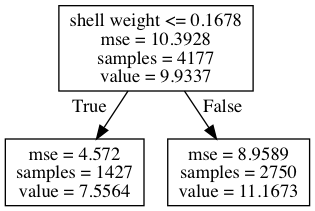

In [20]:
dot_data = export_graphviz(dt_reg, out_file=None, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

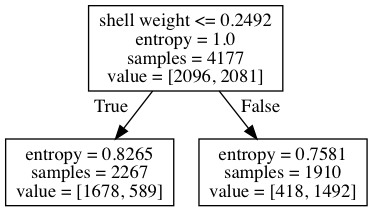

In [21]:
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [22]:
pred, bias, contrib = ti.predict(dt_clf, X_train)

print contrib[0]

print 0.4982 - 0.2598

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.23838972 -0.23838972]]
0.2384


## Depth of 2

In [88]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

dt_clf.fit(X_train, y_train)
X_test = X_train.iloc[:10, :]
pred, bias, contrib = ti.predict(dt_clf, X_train)

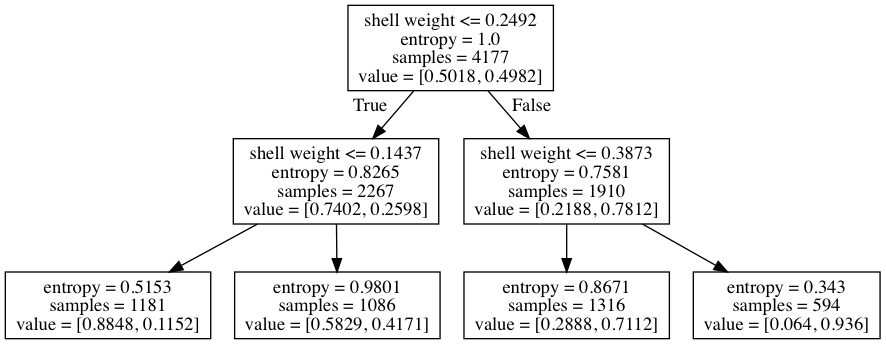

In [89]:
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [90]:
X_train.iloc[0:1, :]

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
0,2,0.455,0.365,0.095,0.514,0.2245,0.101,0.15


In [97]:
pd.Series([str(i) for i in contrib]).value_counts()

[[ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [-0.21304175  0.21304175]]    1316
[[ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.38304781 -0.38304781]]    1181
[[ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.08107738 -0.08107738]]    1086
[[ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [ 0.          0.        ]\n [-0.43782248  0.43782248]]     594
dtype: int64

In [26]:
print contrib[0]
print
print 0.4171 - 0.4982

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.08107738 -0.08107738]]

-0.0811


## Depth of 3

In [108]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=0)

dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
X_test = X_train.iloc[:10, :]

In [109]:
%%time
pred, bias, contrib = ti.predict(dt_clf, X_train)

CPU times: user 27.1 ms, sys: 3.91 ms, total: 31 ms
Wall time: 32 ms


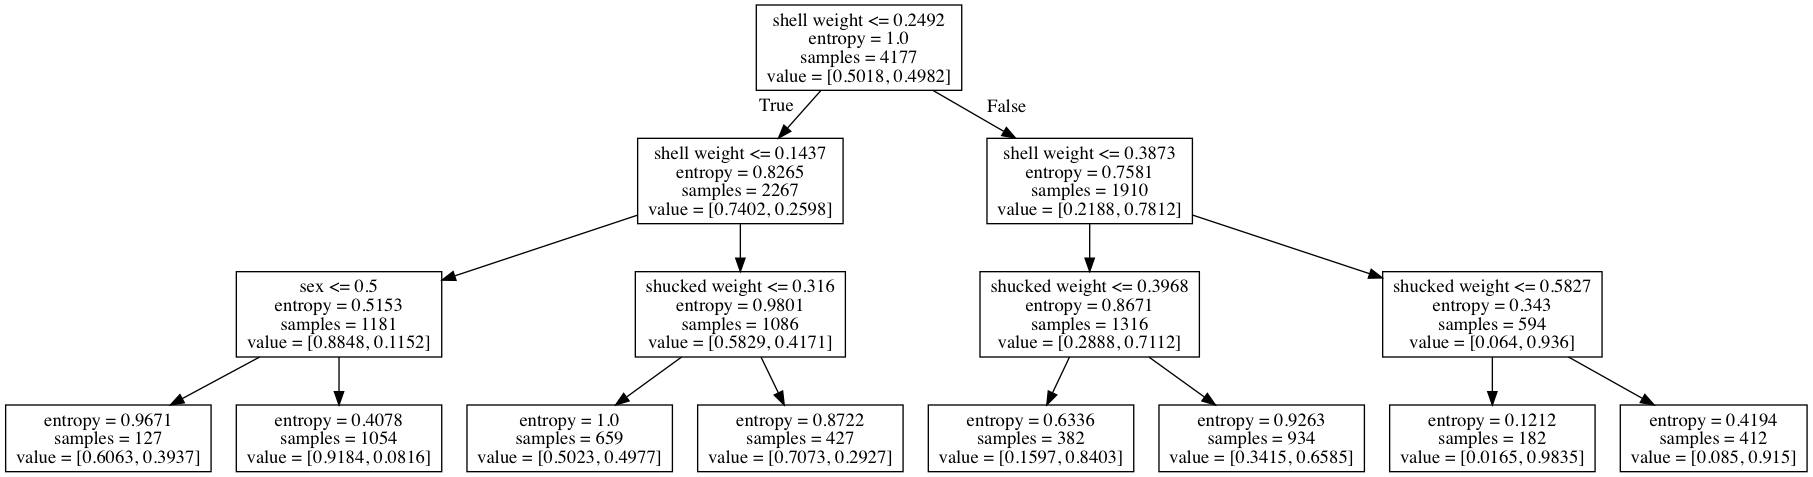

In [110]:
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [112]:
y_train.mean()

0.4982044529566675

In [141]:
n = 5
example = X_train.iloc[n:n+1, :]
display(example)
print dt_clf.predict_proba(example)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
5,1,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12


[[ 0.91840607  0.08159393]]


In [139]:
dec_path_series = pd.Series([str(i) for i in dt_clf.decision_path(X_train).toarray()])
dec_path_series.value_counts()

[1 1 1 0 1 0 0 0 0 0 0 0 0 0 0]    1054
[1 0 0 0 0 0 0 0 1 1 0 1 0 0 0]     934
[1 1 0 0 0 1 1 0 0 0 0 0 0 0 0]     659
[1 1 0 0 0 1 0 1 0 0 0 0 0 0 0]     427
[1 0 0 0 0 0 0 0 1 0 0 0 1 0 1]     412
[1 0 0 0 0 0 0 0 1 1 1 0 0 0 0]     382
[1 0 0 0 0 0 0 0 1 0 0 0 1 1 0]     182
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]     127
dtype: int64

In [137]:
dec_path_series[dec_path_series == '[1 0 0 0 0 0 0 0 1 0 0 0 1 1 0]'].head()

67    [1 0 0 0 0 0 0 0 1 0 0 0 1 1 0]
72    [1 0 0 0 0 0 0 0 1 0 0 0 1 1 0]
81    [1 0 0 0 0 0 0 0 1 0 0 0 1 1 0]
83    [1 0 0 0 0 0 0 0 1 0 0 0 1 1 0]
85    [1 0 0 0 0 0 0 0 1 0 0 0 1 1 0]
dtype: object

In [142]:
print contrib[n]

[[ 0.03356272 -0.03356272]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.38304781 -0.38304781]]


In [143]:
print contrib[67]

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.04748955  0.04748955]
 [ 0.          0.        ]
 [-0.43782248  0.43782248]]


In [115]:
n = 31
example = X_train.iloc[n:n+1, :]
display(example)
print dt_clf.predict_proba(example)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
31,0,0.68,0.56,0.165,1.639,0.6055,0.2805,0.46


[[ 0.08495146  0.91504854]]


In [116]:
print contrib[n]

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.02097839 -0.02097839]
 [ 0.          0.        ]
 [-0.43782248  0.43782248]]


In [47]:
display(example)
print rf_clf.predict_proba(example)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
31,0,0.68,0.56,0.165,1.639,0.6055,0.2805,0.46


[[ 0.  1.]]


In [50]:
contrib[n]

array([[-0.00120018,  0.00120018],
       [-0.04355222,  0.04355222],
       [-0.0883292 ,  0.0883292 ],
       [-0.05067806,  0.05067806],
       [-0.09092404,  0.09092404],
       [-0.02262394,  0.02262394],
       [-0.04860123,  0.04860123],
       [-0.15448376,  0.15448376]])

In [74]:
contrib_df = pd.DataFrame(contrib[:, :, 1], columns=X_train.columns)
contrib_df['y'] = y_train

In [75]:
contrib_df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,y
0,0.062405,0.056172,0.068996,0.003633,0.029909,0.060042,-0.018391,-0.022373,1
1,0.125027,-0.028458,-0.097985,-0.099387,-0.084033,-0.007283,-0.100464,-0.147023,0
2,0.067688,-0.074234,-0.109395,-0.101097,-0.034544,0.038407,-0.034067,-0.072365,0
3,0.031902,0.093919,0.011623,-0.014105,0.014392,0.010869,0.011575,0.060217,1
4,-0.050050,-0.016084,-0.067652,-0.099053,-0.047197,-0.003477,-0.090085,-0.126009,0


In [79]:
print contrib_df.query('y == 1').mean()
print contrib_df.query('y == 0').mean()

sex               0.015768
length            0.032541
diameter          0.042730
height            0.049943
whole weight      0.054766
shucked weight    0.045983
viscera weight    0.059549
shell weight      0.094999
y                 1.000000
dtype: float64
sex              -0.015340
length           -0.031948
diameter         -0.042304
height           -0.049744
whole weight     -0.054262
shucked weight   -0.047013
viscera weight   -0.060295
shell weight     -0.095619
y                 0.000000
dtype: float64


In [81]:
print contrib_df.query('y == 1').std()
print contrib_df.query('y == 0').std()

sex               0.048451
length            0.026958
diameter          0.033143
height            0.065035
whole weight      0.036693
shucked weight    0.069685
viscera weight    0.048849
shell weight      0.091352
y                 0.000000
dtype: float64
sex               0.059077
length            0.030401
diameter          0.041849
height            0.061164
whole weight      0.032970
shucked weight    0.067577
viscera weight    0.050881
shell weight      0.082839
y                 0.000000
dtype: float64


In [85]:
contrib_df.query('y == 1').sort_values('shell weight').head(10)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,y
804,0.003470,-0.022226,0.021332,0.008521,0.073139,0.122261,0.232829,-0.228933,1
2413,0.056046,0.012450,0.077023,0.063831,0.033867,0.072568,0.181580,-0.206973,1
3900,0.032390,0.060709,0.030437,0.246650,-0.000390,0.069322,-0.062269,-0.196456,1
2470,0.015706,0.026256,0.031891,0.115349,0.111466,0.041309,0.173798,-0.195384,1
2282,0.073304,0.074007,0.090514,-0.027947,0.069723,-0.033603,0.151887,-0.177492,1
751,0.023995,-0.002825,-0.000892,-0.070299,0.013411,0.174834,0.259036,-0.176869,1
3375,0.109080,0.034602,-0.007429,0.136257,0.026429,0.089142,0.156865,-0.174554,1
555,-0.031176,0.021559,0.037284,0.167241,-0.017636,0.068451,0.227290,-0.172620,1
729,0.080055,0.040591,-0.000936,-0.074718,0.108067,0.159433,0.185532,-0.167632,1
3128,0.013863,0.050620,0.149166,0.191953,0.052467,-0.015283,0.093161,-0.165555,1


In [86]:
contrib_df.query('y == 1').sort_values('shell weight').tail(10)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,y
2106,0.011305,0.004084,0.013126,0.033645,0.042650,0.038593,0.061736,0.275253,1
3576,-0.011454,0.006751,0.035524,0.034709,0.043086,0.016885,0.049472,0.275419,1
2155,0.013620,-0.000356,0.007842,0.087954,0.061769,-0.014594,0.037524,0.276632,1
575,-0.011852,0.043806,0.049489,-0.029782,0.042467,-0.045635,0.086415,0.285484,1
428,0.056860,0.018592,0.039582,-0.094797,0.059492,0.021029,-0.056674,0.286308,1
574,0.020165,0.016964,0.026681,-0.017790,0.033701,0.041474,0.041463,0.287735,1
722,0.028192,0.012861,0.017472,-0.026076,0.081167,0.017575,0.032226,0.306975,1
873,-0.003571,0.017121,0.035627,0.003931,0.028369,0.004920,0.064045,0.309951,1
86,0.008034,0.026803,0.010431,-0.006077,0.041011,-0.019817,0.065614,0.314395,1
2356,0.018316,0.003624,0.031649,-0.018054,0.079122,-0.009853,0.054069,0.321519,1
